In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from logistics import new_cav_model , J_analytical_new, fourier_transform_matrix, fast_f_t, spectrum_1
from logistics_exact_cavity import Driven_cavity_class,two_modes_cavity
from numpy.fft import fft,fftfreq
from scipy.interpolate import interp1d	
from matplotlib import gridspec

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14  


From today's meeting, we agreed that a Thorough exploration of the spectrum needs to be done. The message I take is
1. verify the fourier transform. change dt and t_max
2. it is more interesting to show what happens when $\gamma \tau $ grows 

# 0. trash (delete in the future)

In [3]:
def average_fft(x, y, Ms):
	spectra = []
	freqs_list = []

	for M in Ms:
		omega, A = fast_f_t(x, y, M)
		freqs_list.append(omega)
		spectra.append(A)

	omega_min = max(freqs[0] for freqs in freqs_list)     # límite inferior común
	omega_max = min(freqs[-1] for freqs in freqs_list)    # límite superior común
	N_common = max(len(f) for f in freqs_list)            # densidad similar a la mayor
	omega_common = np.linspace(omega_min, omega_max, N_common)


	spectra_interp = []
	for omega, A in zip(freqs_list, spectra):
		f_interp = interp1d(omega, A, kind='linear', bounds_error=False, fill_value=0.0)
		spectra_interp.append(f_interp(omega_common))

	A_avg = np.mean(spectra_interp, axis=0)

	return omega_common, A_avg

In [4]:
gamma = 0.8
phi = 2*np.pi
tau = 1 
t_max = 200 * tau
dt = tau/100


In [4]:
model = new_cav_model(gamma,phi,tau)
model.evolve(t_max,dt)
t,e = model.excited_state([1,0])
a_out_flat = model.a_out_array[:,2]


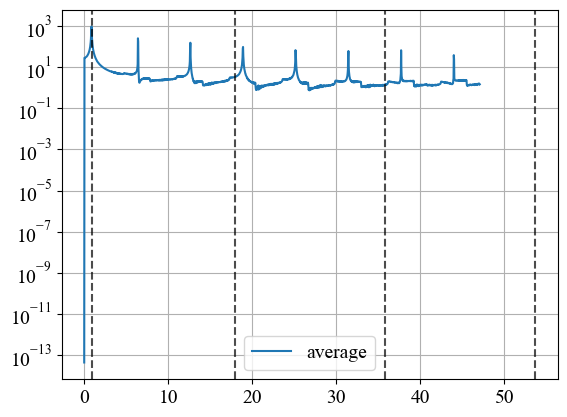

In [5]:
M_flatten = np.arange(3000,3051,1)
w_def,u_def = average_fft(t,a_out_flat,M_flatten)

plt.plot(w_def,u_def,label='average')
plt.grid()
plt.legend()
plt.axvline(np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
plt.axvline(20*np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
plt.axvline(40*np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
plt.axvline(60*np.sqrt(gamma/tau),linestyle='--',color='k',alpha = 0.7)
#plt.axvline(np.sqrt(gamma/tau))
plt.yscale('log')
plt.show()

In [175]:
from joblib import Parallel, delayed

def paralelizar(parameter_list,f,ncores: int = 65):
	resultados = Parallel(n_jobs=ncores, backend='loky')(
		delayed(f)(param) for param in parameter_list
	)
	return resultados


# 1. Spectrum as a function of $\gamma \tau $ 

In [170]:
phi = 2*np.pi
tau = 1 
t_max = 200 * tau
dt = tau/75
gamma_0 = 5

gamma_values = np.linspace(0.05,200,1000)
M_flatten = np.arange(4000,4101,1)

def sample_gamma(gamma_value):
	model = new_cav_model(gamma_value,phi,tau)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

In [171]:
prueba = paralelizar(gamma_values,sample_gamma)
w = np.asarray(prueba[0][0])
u_map = np.asarray( [data[1] for data in prueba])

In [381]:
phi = 2*np.pi
tau = 1 
t_max = 200 * tau
dt = tau/75
gamma_0 = 5

gamma_values = np.linspace(0.05,200,1000)
M_flatten = np.arange(4000,4101,1)

def sample_gamma_2pi_18(gamma_value):
	phi_s = 2*np.pi
	tau_s = 1.86 
	model = new_cav_model(gamma_value,phi_s,tau_s)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

def sample_gamma_pi_18(gamma_value):
	phi_s = np.pi
	tau_s = 1.86 
	model = new_cav_model(gamma_value,phi_s,tau_s)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

def sample_gamma_pi_1(gamma_value):
	phi_s = np.pi
	tau_s = 1
	model = new_cav_model(gamma_value,phi_s,tau_s)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

def sample_gamma_pi_halfed(gamma_value):
	phi_s = np.pi/2
	tau_s = 1
	model = new_cav_model(gamma_value,phi_s,tau_s)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

def sample_gamma_any(gamma_value):
	phi_s = 1.76*np.pi
	tau_s = 0.8
	model = new_cav_model(gamma_value,phi_s,tau_s)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u


In [176]:
data_2p_18 = paralelizar(gamma_values,sample_gamma_2pi_18)
w_2p_18 = np.asarray(data_2p_18[0][0])
u_map_2p_18 = np.asarray( [data[1] for data in data_2p_18])

data_p_18 = paralelizar(gamma_values,sample_gamma_pi_18)
w_p_18 = np.asarray(data_p_18)
u_map_p_18 = np.asarray( [data[1] for data in data_p_18])

data_p_1 = paralelizar(gamma_values,sample_gamma_pi_1)
w_p_1 = np.asarray(data_p_1)
u_map_p_1 = np.asarray( [data[1] for data in data_p_1])

In [192]:
data_p_half = paralelizar(gamma_values,sample_gamma_pi_halfed)
w_p_half = np.asarray(data_p_half)
u_map_p_half = np.asarray( [data[1] for data in data_p_half])

In [382]:
gamma_values_fast = np.linspace(0.05,200,300)

data_any = paralelizar(gamma_values_fast,sample_gamma_any)
w_p_any = np.asarray(data_any)
u_map_any = np.asarray( [data[1] for data in data_any])

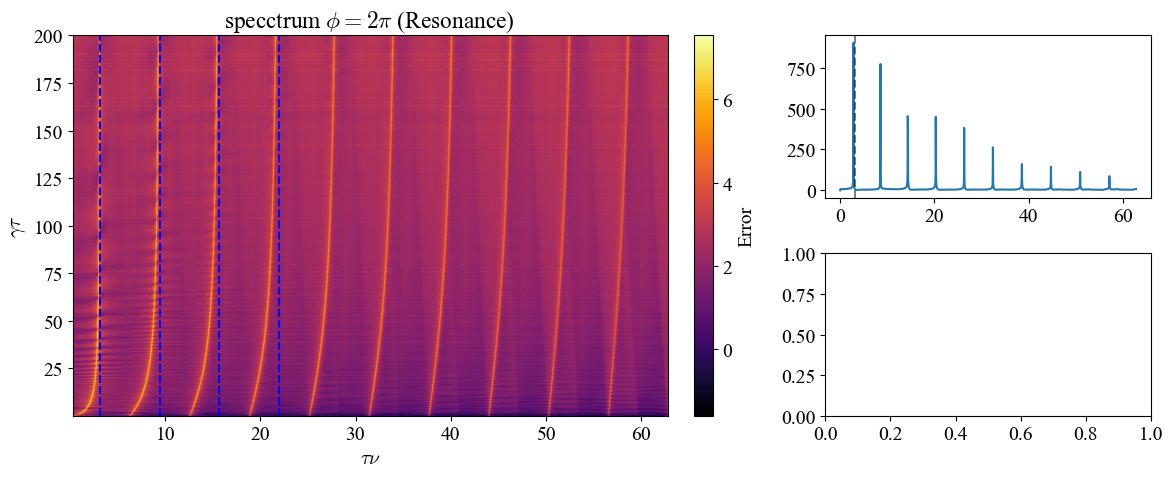

In [187]:
# ---- plot phi=2pi tau =1-------------
map_plot = u_map[:,10:]
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = 2\pi  $ (Resonance) ')

ax_heat.axvline(np.pi, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(3*np.pi, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(5*np.pi, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(7*np.pi, color='b', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

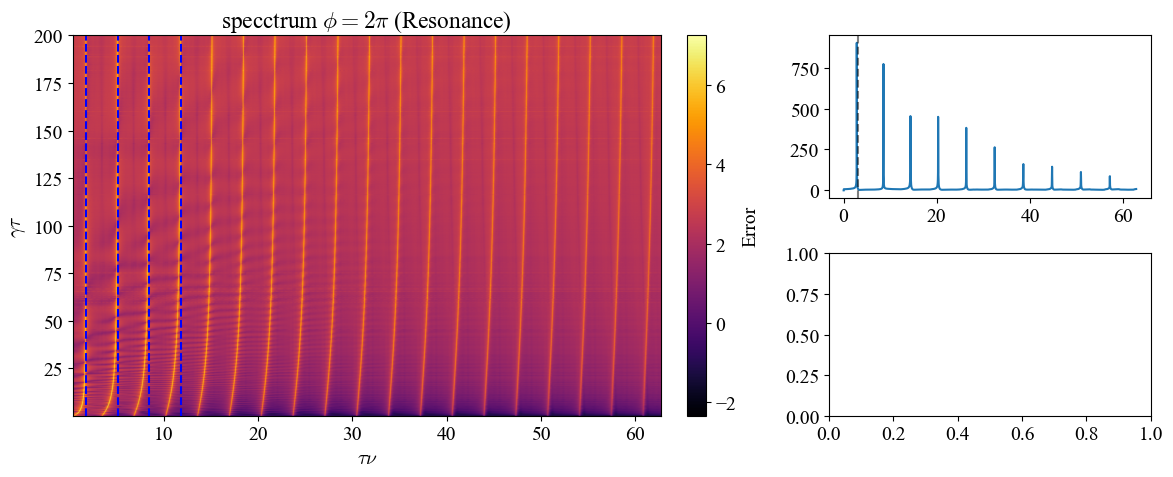

In [ ]:
# --------plot phi=2p tau = 1.86 -------------
map_plot_2 = u_map_2p_18[:,10:]
t18 = 1.86
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = 2\pi  $ (Resonance) ')

ax_heat.axvline(np.pi/t18, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(3*np.pi/t18, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(5*np.pi/t18, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(7*np.pi/t18, color='b', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

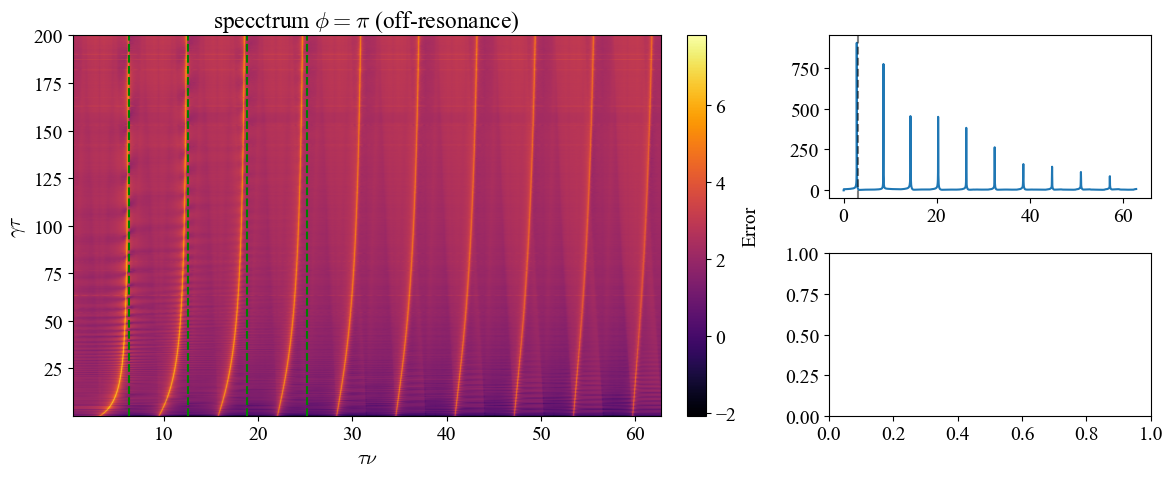

In [189]:
# ------plot phi = pi tau = 1 -----------
map_plot_2 = u_map_p_1[:,10:]
t18 = 1.86
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = \pi  $ (off-resonance) ')

ax_heat.axvline(2*np.pi, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(4*np.pi, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(6*np.pi, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(8*np.pi, color='g', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

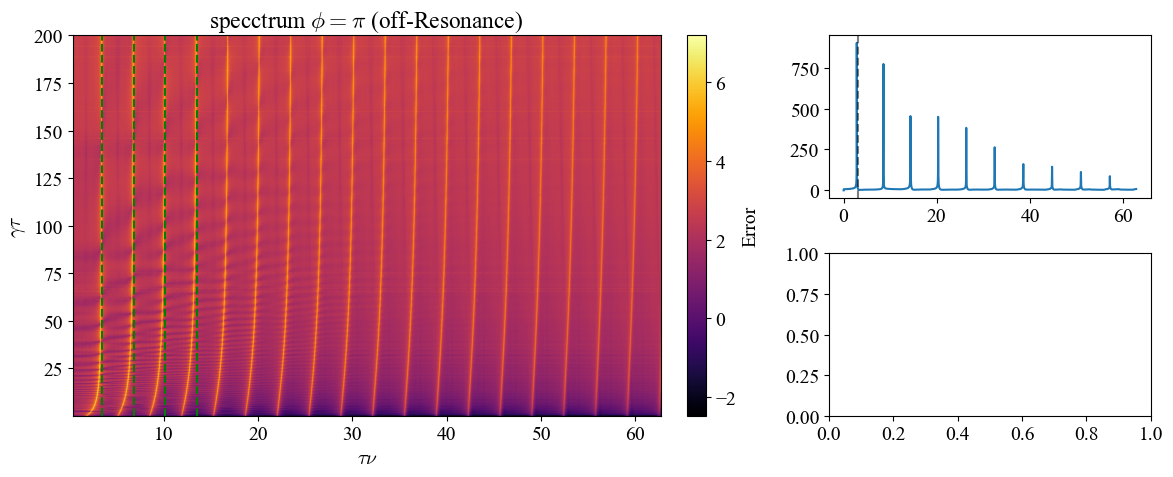

In [190]:
# ---------- plot phi = pi tau = 1.8 ------------------
map_plot_2 = u_map_p_18[:,10:]
t18 = 1.86
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = \pi  $ (off-Resonance) ')

ax_heat.axvline(2*np.pi/t18, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(4*np.pi/t18, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(6*np.pi/t18, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(8*np.pi/t18, color='g', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

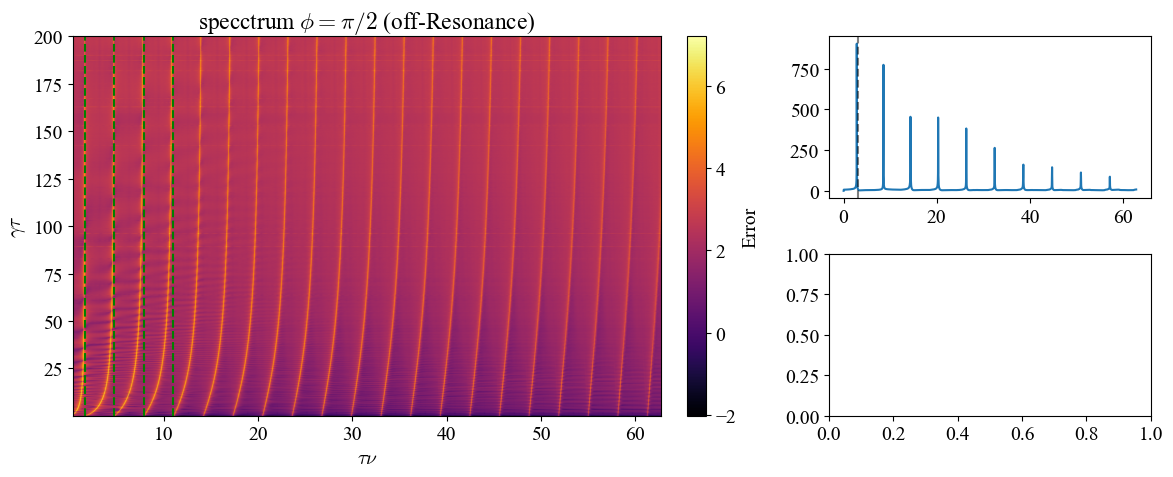

In [226]:
# ---------- plot phi = pi/2 tau = 1.8 ------------------
map_plot_2 = u_map_p_half[:,10:]
t18 = 1.86
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi = \pi /2 $ (off-Resonance) ')

ax_heat.axvline(np.pi/2, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(np.pi/2+np.pi, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(np.pi/2+2*np.pi, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(np.pi/2+3*np.pi, color='g', linestyle='--', linewidth=1.5)


cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()



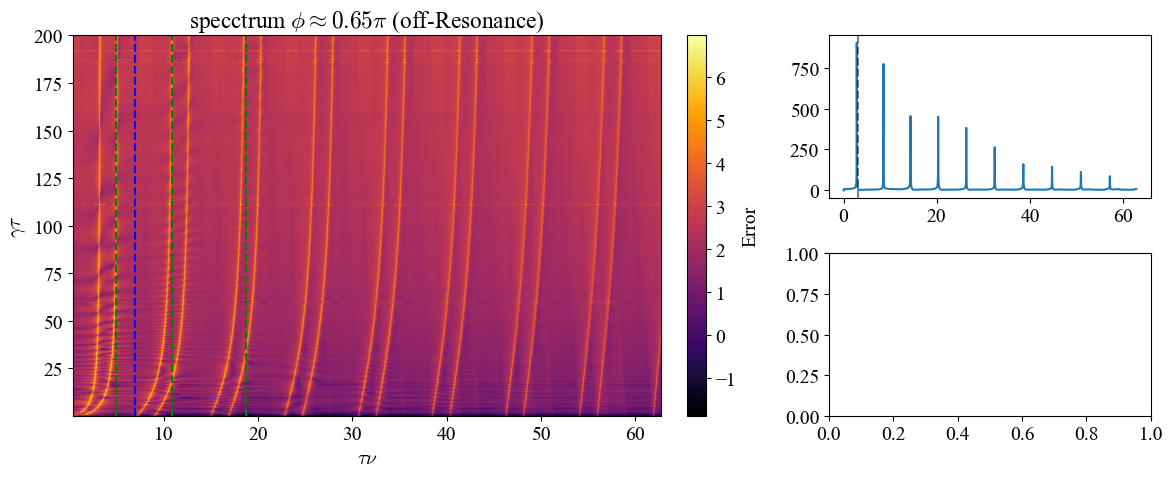

In [407]:
# ---- plot with 'random' numbers -------------
map_plot_2 = u_map_any[:,2:]
phi_s = 1.76*np.pi
tau_s = 0.8
split = phi_s/(tau_s)
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[10], w[-1],gamma_values[0], gamma_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$  \tau \nu  $')
ax_heat.set_ylabel(r"$\gamma \tau $")
ax_heat.set_title(r'specctrum $\phi \approx 0.65 \pi $ (off-Resonance) ')

ax_heat.axvline(split, color='b', linestyle='--', linewidth=1.5)
ax_heat.axvline(np.pi/tau_s+split, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(3*np.pi/tau_s+split, color='g', linestyle='--', linewidth=1.5)
ax_heat.axvline(3*np.pi/tau_s-split, color='g', linestyle='--', linewidth=1.5)






cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

Ok, rather than losing my time, I am going to see what happens in the limit $\gamma \tau >> 1$ as a function of $\phi$ 

# 3. Spectrum Vs $\phi$ in the $\gamma \tau >> 1$ limit 

In [387]:
def sample_phi_NM(phi_value):
	gamma_sample=200
	tau_sample = 1.4
	model = new_cav_model(gamma_sample,phi_value,tau_sample)
	model.evolve(t_max,dt)
	t,_ = model.excited_state([1,0])
	a_out_flat = model.a_out_array[:,2]
	w,u = average_fft(t,a_out_flat,M_flatten)
	return w,u

In [388]:
phi_values = np.linspace(0,2*np.pi,100)

data_phi = paralelizar(phi_values,sample_phi_NM)
w_phi = np.asarray(data_phi)
u_map_phi = np.asarray( [data[1] for data in data_phi])

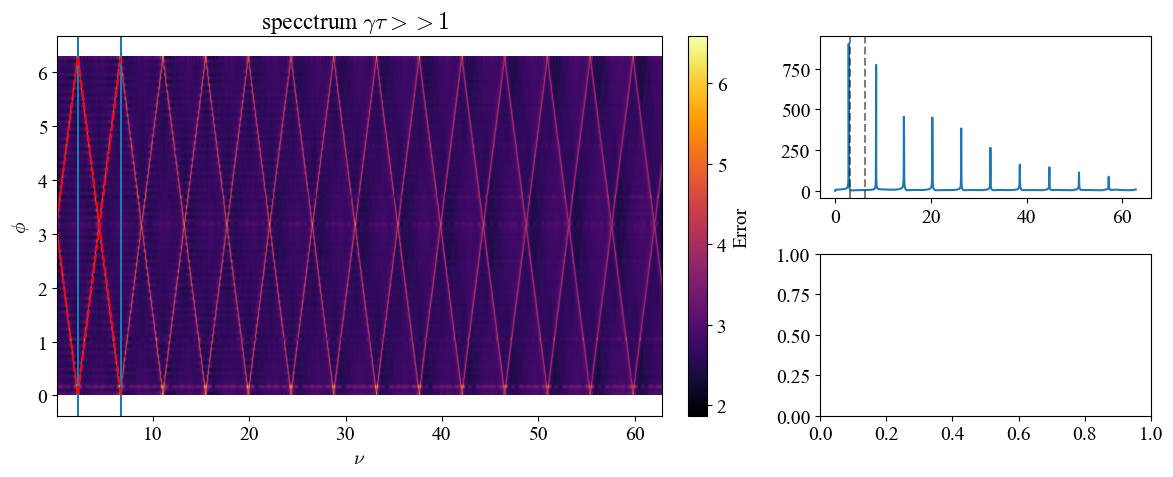

In [426]:
# ---- plot gamma tau >> 1 -------------
map_plot_2 = u_map_phi[:,3:]
fig = plt.figure(figsize=(12, 5))
tau_s = 1.4 
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1], figure=fig)

ax_heat = fig.add_subplot(gs[:, 0])
im = ax_heat.imshow(
	np.log(map_plot_2),
	origin='lower',
	aspect='auto',
	extent=[ w[3], w[-1],phi_values[0], phi_values[-1],],
	cmap='inferno'
)
ax_heat.set_xlabel(r'$   \nu  $')
ax_heat.set_ylabel(r"$ \phi $")
ax_heat.set_title(r'specctrum $ \gamma \tau >> 1  $  ')
ax_heat.axvline(np.pi/tau_s)
ax_heat.axvline(3*np.pi/tau_s)
ax_heat.plot(w[3:74],np.pi+w[3:74]*tau_s,'r--')
ax_heat.plot(w[3:74],np.pi-w[3:74]*tau_s,'r--')

ax_heat.plot(w[74:3*74],-np.pi+w[74:3*74]*tau_s,'r--')
ax_heat.plot(w[74:3*74],3*np.pi-w[74:3*74]*tau_s,'r--')

cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label('Error')

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(w,u_map[180,:])
ax_top.axvline(np.pi/tau,color='k',linestyle ='--',alpha = 0.5)
ax_top.axvline(2*np.pi/tau,color='k',linestyle ='--',alpha = 0.5)

ax_bottom = fig.add_subplot(gs[1, 1])

plt.tight_layout()
plt.show()

In [427]:
np.savez('data_spectrum.npz', data_phi=data_phi, data_any=data_any)

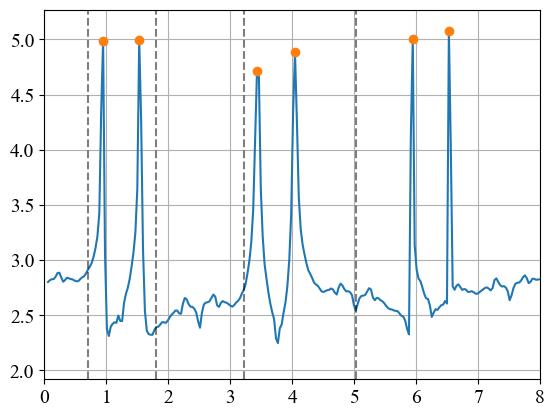

In [378]:
from scipy.signal import find_peaks

u_ref = np.log(u_map_any[-1,2:])
w_ref = w[2:]

picos = find_peaks(u_ref,4.5)
w_picos= w_ref[picos[0]]
split =phi_s/(np.pi*tau_s)

plt.plot(w_ref,u_ref)
plt.plot(w_picos,u_ref[picos[0]],'o')
plt.axvline(split,linestyle='--',color='k',alpha=0.5)
plt.axvline(2*np.pi/tau_s+split,linestyle='--',color='k',alpha=0.5)
plt.axvline(2*np.pi/tau_s-split,linestyle='--',color='k',alpha=0.5)
plt.axvline(4*np.pi/tau_s,linestyle='--',color='k',alpha=0.5)
plt.xlim(0,8)
plt.grid()
plt.show()